# Mexico Antenna retagging and GC visualization
La idea es

* Graficar el mapa de la zona epidemica de Mexico
* Definir a mano la zona GC y agregar esa info a la de las antennas

In [1]:
import pandas as pd; import numpy as np; import os;import random;
pd.set_option('display.max_rows', 300)
from matplotlib import pyplot as plt
%matplotlib inline
import unicodedata
import gzip

import geopandas as gpd;
from geopandas.geoseries import *
import shapely

rootdir=os.getcwd()
rootdir = os.path.expanduser('~/Repositories/mobility-study')
np.random.seed(2015)

ImportError: Gtk3 backend requires pygobject to be installed.

In [ ]:
global mapa

In [ ]:
mapa = gpd.GeoDataFrame.from_file(rootdir+'/mapas/national_estatal.geojson')

In [6]:
mapa[mapa['NOMBRE']==u'Chiapas']

,CVEGEO,NOMBRE,OID,POB1,POB10,POB10_R,POB11,POB11_R,POB12,POB12_R,...,POB7_R,POB8,POB80,POB80_R,POB81,POB81_R,POB8_R,POB9,POB9_R,geometry
6,07,Chiapas,7,4796580,968252,20.2,1334789,27.8,2860151,59.6,...,6.9,1645047,116587,5.0,78285,3.3,34.3,326491,6.8,POLYGON ((-91.97363681088724 17.91143118947898...


In [2]:
!head antennas_mexico.csv

ID|LATITUDE|LONGITUDE|STATE|EPIDEMIC
2797|14.671|-92.372|Chiapas|0
3060|14.682|-92.155|Chiapas|0
3344|14.721|-92.424|Chiapas|0
3487|14.778|-92.179|Chiapas|0
1924|14.786|-92.366|Chiapas|0
1001|14.87|-92.285|Chiapas|0
2914|14.882|-92.265|Chiapas|0
2094|14.888|-92.283|Chiapas|0
2055|14.888|-92.25|Chiapas|0


In [7]:
antenas = pd.read_csv("antennas_mexico.csv",sep="|",
                     header=0,index)
#paso lat y long a su forma decimal
antenas['LATITUDE']=antenas['LATITUDE']*1.0/1000
antenas['LONGITUDE']=antenas['LONGITUDE']*1.0/1000

#chequeo resultados rapido
antenas.sample(100)

,ID,LATITUDE,LONGITUDE
807,553,19.238,-99.643
4361,4281,32.447,-116.991
288,2208,18.019,-92.939
2740,823,20.639,-103.332
2723,1174,20.630,-103.407
4447,4290,32.623,-115.481
263,755,17.991,-92.916
3853,4081,25.663,-100.297
2771,1437,20.655,-105.214
1641,1478,19.425,-99.193


In [12]:
#chequeo si hay info faltante
antenas[pd.isnull(antenas).any(axis=1)]

,ID,LATITUDE,LONGITUDE


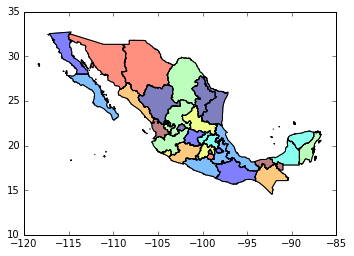

In [13]:
mapa.plot()

# Muy importante!
 
Las coordenadas en un mapa se dan en (lat, long) que no corresponden a las coordenadas cartesianas sino a (y,x) con lo cual es importante armar los **Point** con (long,lat), sino imposible comprarar quien esta dentro de que..

In [8]:
subset =  antenas[['LONGITUDE','LATITUDE']]
tuples = [shapely.geometry.Point(x) for x in subset.values] 
global antenas_gpd 
antenas_gpd =  gpd.GeoSeries(tuples)

In [9]:
multipoligono = mapa['geometry'].ix[6]
multipoligono.contains(antenas_gpd.ix[2])

True

In [10]:
def preparar_nombre(s):
        #esta linea elimina las tildes espacios puntos y similar"
        sin_tilde = ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn'))
        limpio = sin_tilde.replace(" ","_").replace(".","")
        #me quedo con el nombre corto de Veracruz
        if limpio == u'Veracruz_de_Ignacio_de_la_Llave':
            limpio = u'Veracruz'
        return limpio

In [11]:
mapa['NOMBRE'] = mapa['NOMBRE'].apply(lambda s: preparar_nombre(s))

In [12]:
def get_state_name(ant,lista_de_geometrias,lista_de_nombres):
        sol ="Error";
        for i in range(len(lista_de_geometrias)):
            if lista_de_geometrias.ix[i].contains(ant):
                sol = lista_de_nombres[i]
                break
        return sol

In [13]:
len(antenas_gpd)

4464

In [14]:
%%time 
antenas_gpd.ix[1:100].apply(lambda ant: get_state_name(ant, mapa['geometry'],mapa.NOMBRE.values))


CPU times: user 456 ms, sys: 0 ns, total: 456 ms
Wall time: 456 ms


1       Chiapas
2       Chiapas
3       Chiapas
4       Chiapas
5       Chiapas
6       Chiapas
7       Chiapas
8       Chiapas
9       Chiapas
10      Chiapas
11      Chiapas
12      Chiapas
13      Chiapas
14      Chiapas
15      Chiapas
16      Chiapas
17      Chiapas
18      Chiapas
19      Chiapas
20      Chiapas
21       Oaxaca
22       Oaxaca
23      Chiapas
24       Oaxaca
25      Chiapas
26       Oaxaca
27       Oaxaca
28       Oaxaca
29       Oaxaca
30      Chiapas
31      Chiapas
32      Chiapas
33      Chiapas
34      Chiapas
35       Oaxaca
36       Oaxaca
37       Oaxaca
38      Chiapas
39      Chiapas
40      Chiapas
41      Chiapas
42       Oaxaca
43       Oaxaca
44       Oaxaca
45      Chiapas
46      Chiapas
47      Chiapas
48      Chiapas
49      Chiapas
50       Oaxaca
51      Chiapas
52     Guerrero
53      Chiapas
54      Chiapas
55      Chiapas
56      Chiapas
57      Chiapas
58      Chiapas
59      Chiapas
60      Chiapas
61     Guerrero
62      Chiapas
63      

In [15]:
%%time
antenas['STATE'] = antenas_gpd.apply(lambda ant: get_state_name(ant, mapa['geometry'],mapa.NOMBRE.values))

CPU times: user 35.3 s, sys: 4 ms, total: 35.3 s
Wall time: 35.3 s


In [16]:
#miro aquellas que no pude hacerlo sistematicamente y veo si las elimino o las "corro"
antenas[antenas['STATE']=="Error"]

,ID,LATITUDE,LONGITUDE,STATE
3267,2614,21.183,-86.807,Error
3500,4293,23.005,-109.714,Error
3537,1974,23.258,-106.463,Error


In [28]:
antenas['STATE'].unique()

array([u'Chiapas', u'Oaxaca', u'Guerrero', u'Tabasco', u'Veracruz',
       u'Michoacan_de_Ocampo', u'Puebla', u'Morelos', u'Quintana_Roo',
       u'Campeche', u'Mexico', u'Colima', u'Tlaxcala', u'Distrito_Federal',
       u'Jalisco', u'Hidalgo', u'Guanajuato', u'Queretaro', u'Yucatan',
       u'Nayarit', u'Aguascalientes', u'San_Luis_Potosi', u'Tamaulipas',
       u'Zacatecas', u'Sinaloa', u'Baja_California_Sur', u'Durango',
       u'Nuevo_Leon', u'Coahuila_de_Zaragoza', u'Sonora', u'Chihuahua',
       u'Baja_California'], dtype=object)

In [18]:
antenas.at[antenas['STATE']==u'Veracruz_de_Ignacio_de_la_Llave','STATE']=u'Veracruz'

In [19]:
#asigno a mano aquellas que me habin quedado un toque afuera
antenas.at[3267,'LONGITUDE']=-86.857
antenas.at[3267,'STATE']=u'Quintana_Roo'
antenas.at[3500,'LATITUDE']=23.055
antenas.at[3500,'STATE']=u'Baja_California_Sur'
antenas.at[3537,'LONGITUDE']=-106.403
antenas.at[3537,'STATE']=u'Sinaloa'

In [20]:
#chequeo nuevamente
antenas[antenas['STATE']=="Error"]

,ID,LATITUDE,LONGITUDE,STATE


## Ahora vemos cuales son del Gran Chaco

recordar que estas son las que estan en los estados de Jalisco, Oaxaca, Veracruz, Guerrero,Morelos, Yucatan, Queretaro, Chiapas, Puebla, Nayarit, Hidalgo y Tabasco.

In [22]:
def get_epidemic_state(estado):
    sol=0 
    epidemic_states =  [u'Jalisco', u'Oaxaca', u'Puebla',u'Veracruz', u'Guerrero',u'Morelos',
                     u'Tabasco',u'Hidalgo']
    if estado in epidemic_states:
        sol =1
    return sol    

In [23]:
antenas['EPIDEMIC']=antenas['STATE'].apply(lambda k: get_epidemic_state(k))

In [24]:
antenas.loc[np.random.permutation(antenas.index)[:30]]

,ID,LATITUDE,LONGITUDE,STATE,EPIDEMIC
4190,3965,28.189,-105.472,Chihuahua,0
1715,4470,19.431,-99.154,Distrito_Federal,0
707,1970,19.117,-98.168,Tlaxcala,0
4262,4079,29.082,-110.944,Sonora,0
3363,110,22.037,-102.270,Aguascalientes,0
4175,4255,27.925,-110.882,Sonora,0
3231,3057,21.151,-86.825,Quintana_Roo,0
2573,3048,20.478,-99.218,Hidalgo,1
1169,1713,19.348,-98.996,Distrito_Federal,0
1609,4157,19.420,-99.020,Mexico,0


In [25]:
antenas.EPIDEMIC.sum()

1080

In [26]:
len(antenas),antenas.EPIDEMIC.sum(),antenas.EPIDEMIC.sum()*1.0/len(antenas)

(4464, 1080, 0.24193548387096775)

In [27]:
fig = plt.figure(figsize=(8,8),dpi=300)

In [27]:
epidemic_states =  [u'Jalisco', u'Oaxaca', u'Puebla',u'Veracruz', u'Guerrero',u'Morelos',
                     u'Tabasco',u'Hidalgo']

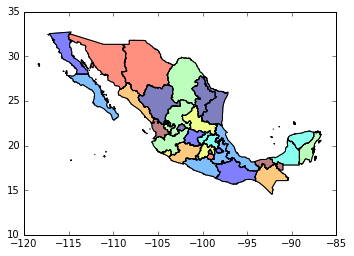

In [28]:
mapa[['geometry','NOMBRE']].plot()
#    .plot(colormap='Accent', alpha=0.7,figsize=(10,10),dpi=300)

In [35]:
antenas.to_csv(rootdir +"/antennas_mexico.csv",index=False,sep="|")

In [40]:
def get_epidemic_state(estado):
    sol=0
    epidemicos = [u'Jalisco', u'Oaxaca', u'Puebla',u'Veracruz', u'Guerrero',u'Morelos',
                     u'Tabasco',u'Hidalgo']
    if estado in epidemicos:
        sol =1
    return sol    

mapa['EPIDEMIC']=mapa['NOMBRE'].apply(lambda k: get_epidemic_state(k))

PySAL not installed, setting map to default


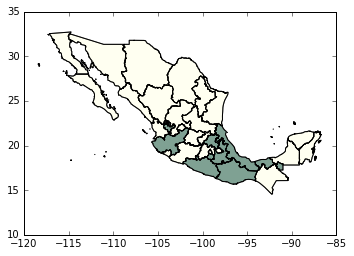

In [41]:
kw = dict(column="EPIDEMIC",k=6,colormap='YlGn')
mapa.plot(scheme = "Quantile",**kw)